# **Evaluación 3**

La Ecuación de Reacción-Difusión en una dimensión está dada por la ecuación diferencial parcial
<center>$\frac{\partial u}{\partial t}=D\frac{\partial^2u}{\partial x^2}+R(u)$</center>

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos.
<br>
<br>Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo:
<center>$2H_2 + O_2 \rightleftarrows 2H_2O$</center>

donde se mezclan 2 moléculas de Hidrógeno y una de Oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.
<br>
<br>Se pude trabajar el caso donde $R(u)=\alpha u$, siendo $\alpha$ el coeficiente de reacción.
<br>
<br>Entonces nos interesa resolver la ecuación
<center>$\frac{\partial u}{\partial t}=D\frac{\partial^2u}{\partial x^2}+\alpha u$</center>

Aquí $u$ denotaría la concentración del compuesto químico. Sí $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor.
<br>Supondremos que $D=1$ y $\alpha=-1$.
<br>
<br>Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moléculas de $2H_2$ con $O_2$ en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura.
<br>![picture](https://drive.google.com/uc?export=view&id=1L4Haj0N8RrzkS_ozdzOuys5C2GKrmrp3)</center>


Se pide adaptar el código desarrollado en el sitio del curso Numerical Methods using Python del Dr. Vivi Andasari de la Universidad de Boston.
<br>
<br>En la sesión 15, se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS). Se provee el código para problemas de condiciones a la frontera tipo Dirichlet y también para el tipo Neumann.
<br>
<br>Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes problemas.

**Ejemplo de BTCS (Dirichlet)**

True


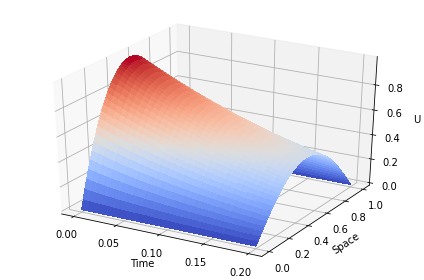

In [20]:
#BTCS con condiciones de Dirichlet
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 0.2

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 0.1  # Diffusion coefficient
alpha = -3 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 4*xspan - 4*xspan**2

#----- Dirichlet boundary conditions -----
U[0,:] = 0.0 
U[-1,:] = 0.0

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

**Ejemplo de BTCS (Neumann)**

True


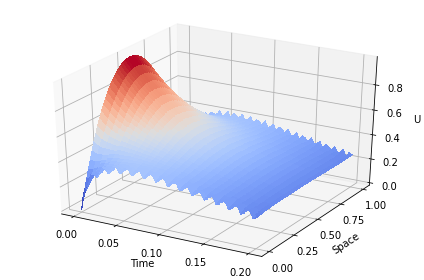

In [21]:
#BTCS con condiciones de Neumann
#Backward method to solve 1D reaction-diffusion equation:
 #   u_t = D * u_xx + alpha * u
    
#with Neumann boundary conditions 
#at x=0: u_x = sin(pi/2)
#at x=L: u_x = sin(3*pi/4) with L=1
#and initial condition u(x,0) = 4*x - 4*x**2

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 0.2

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 0.5  # Diffusion coefficient
alpha = -5 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 4*xspan - 4*xspan**2

#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
f = np.sin(leftBC*np.pi/2)

rightBC = np.arange(1, N+1)
g = np.sin(3*rightBC*np.pi/4)


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

**Problema 1**
<br>
<br> Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,...,1$.
<br>
<br>Muestre una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


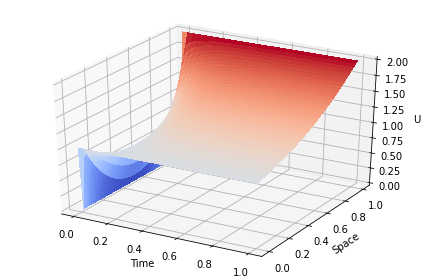

In [14]:
#BTCS con condiciones de Dirichlet
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 1, u(x1,t) = 2
#and initial condition u(x,0) = 0

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#Creamos el número de puntos en los intervalos de espacio y de tiempo
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

#Definimos las coordenadas donde comienza y termina la barra (en este caso es de longitud 1)
x0 = 0
xL = 1

# ----- Spatial discretization step ----- Definimos el tamaño de los pasos en el espacio
dx = (xL - x0)/(M - 1)

#Definimos el intervalo de tiempo en el cual resolveremos
t0 = 0
tF = 1

# ----- Time step ----- Definimos el tamaño de los pasos en el tiempo
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

#Creamos un arreglo para el espacio y otro para el tiempo con puntos equidistantes
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Creamos las diagonales importantes de la matriz
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U ----- Creamos una matriz para U
U = np.zeros((M, N))

#----- Initial condition ----- Definimos la condición inicial
U[:,0] = 0

#----- Dirichlet boundary conditions ----- Definimos las condiciones de frontera (Dirichlet)
U[0,:] = 1.0 
U[-1,:] = 2.0

#Resolvemos numéricamente
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

En la gráfica podemos observar cómo al principio tenemos que la concentración en todo el tubo es 0 e inmediatamente da un salto la concentración en todo el tubo, siendo en $x=L=1$ donde la concentración es más alta. 
<br>A medida que pasa el tiempo, podemos ver como la curva que inicialmente hay en la superficie se va atenuando y empieza a haber una inclinación menos parabólica, y más lineal. Esto indica que la concentración a lo largo del tubo está aumentando de manera lineal desde $x=0$ hasta $x=L=1$.

**Problema 2**
<br>
<br>Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0)=0$. En $x=0$, el flujo de gas es $\frac{\partial u}{\partial t}=0.1$ y en $x=1$ el flujo $\frac{\partial u(1,t)}{\partial t}=0.2$.
<br>
<br>Se pude realizar una simulación numérica para $t=0,...,10$.

True


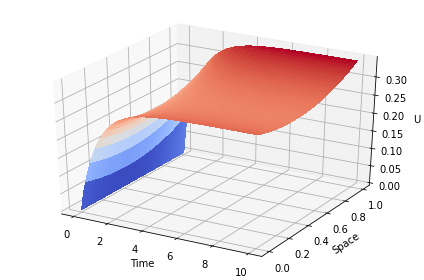

In [1]:
#BTCS con condiciones de Neumann
#Backward method to solve 1D reaction-diffusion equation:
 #   u_t = D * u_xx + alpha * u
    
#with Neumann boundary conditions 
#at x=0: u_x = 0.1
#at x=1: u_x = 0.2 with L=1
#and initial condition u(x,0) = 0

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#Creamos el número de puntos en los intervalos de espacio y de tiempo
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

#Definimos las coordenadas donde comienza y termina la barra (en este caso es de longitud 1)
x0 = 0
xL = 1

# ----- Spatial discretization step ----- Definimos el tamaño de los pasos en el espacio
dx = (xL - x0)/(M - 1)

#Definimos el intervalo de tiempo en el cual resolveremos
t0 = 0
tF = 10

# ----- Time step ----- Definimos el tamaño de los pasos en el tiempo
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s

#Creamos un arreglo para el espacio y otro para el tiempo con puntos equidistantes
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Creamos las diagonales importantes de la matriz
main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U ----- Creamos una matriz para U
U = np.zeros((M, N))

#----- Initial condition ----- Definimos la condición inicial
U[:,0] = 0

#----- Neumann boundary conditions ----- Definimos arreglos para las condiciones de Neumann
t = np.ones([N+1,1]) #Ya que f=0.1 y g=0.2 a través de todo el tiempo, creamos un arreglo de 1s para todo el intervalo de tiempo
#leftBC = np.arange(1, N+1)
f = t*0.1
#rightBC = np.arange(1, N+1)
g = t*0.2

#Resolvemos numéricamente
for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

De la gráfica podemos ver como al inicio la concentración en todo el tubo es nula, y a medida que va pasando el tiempo, ésta va aumentando a lo largo de todo el tubo. Podemos decir que el aumento de concentración es rápido al inicio y luego empieza a atenuarse, parecido a un comportamiento logarítmico. Vemos también que en los extremos del tubo la concentración es un poco más alta que en la sección intermedia.

**Problema 3**
<br>
<br>¿Qué pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha = 0$)?.
<br>
<br>Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.
<br>
<br>Resuelva numéricamente este caso.

Debido a que $\alpha=0$, entonces $R(u)=\alpha u=0$, por lo que tenemos un proceso puramente de difusión.

True


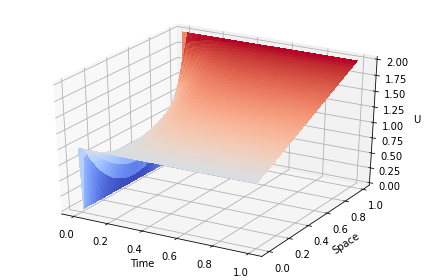

In [15]:
#BTCS con condiciones de Dirichlet
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 1, u(x1,t) = 2
#and initial condition u(x,0) = 0

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#Creamos el número de puntos en los intervalos de espacio y de tiempo
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

#Definimos las coordenadas donde comienza y termina la barra (en este caso es de longitud 1)
x0 = 0
xL = 1

# ----- Spatial discretization step ----- Definimos el tamaño de los pasos en el espacio
dx = (xL - x0)/(M - 1)

#Definimos el intervalo de tiempo en el cual resolveremos
t0 = 0
tF = 1

# ----- Time step ----- Definimos el tamaño de los pasos en el tiempo
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

#Creamos un arreglo para el espacio y otro para el tiempo con puntos equidistantes
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Creamos las diagonales importantes de la matriz
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U ----- Creamos una matriz para U
U = np.zeros((M, N))

#----- Initial condition ----- Definimos la condición inicial
U[:,0] = 0

#----- Dirichlet boundary conditions ----- Definimos las condiciones de frontera (Dirichlet)
U[0,:] = 1.0 
U[-1,:] = 2.0

#Resolvemos numéricamente
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

En la gráfica podemos observar cómo al principio tenemos que la concentración en todo el tubo es 0 e inmediatamente da un salto la concentración en todo el tubo, siendo en $x=L=1$ donde la concentración es más alta. 
<br>A medida que pasa el tiempo, podemos ver como la curva que inicialmente hay en la superficie se va atenuando y empieza a haber una inclinación menos parabólica, y más lineal. Esto indica que la concentración a lo largo del tubo está aumentando de manera lineal desde $x=0$ hasta $x=L=1$.
<br>Este caso se ve muy similar al del primer problema debido a que las condiciones de frontera y la condición inicial son iguales, y además $\alpha=0$, mientras que en el primer problema $\alpha=-1$. Si variamos $\alpha$ podemos ver un mejor contraste con el primer caso, por ejemplo, si tenemos $\alpha=-10$ vemos lo siguiente:

True


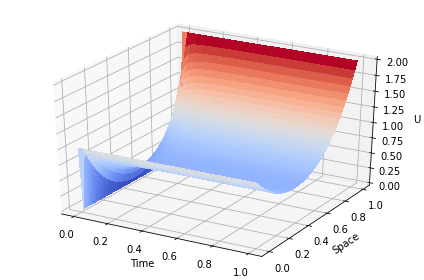

In [17]:
#BTCS con condiciones de Dirichlet
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 1, u(x1,t) = 2
#and initial condition u(x,0) = 0

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#Creamos el número de puntos en los intervalos de espacio y de tiempo
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

#Definimos las coordenadas donde comienza y termina la barra (en este caso es de longitud 1)
x0 = 0
xL = 1

# ----- Spatial discretization step ----- Definimos el tamaño de los pasos en el espacio
dx = (xL - x0)/(M - 1)

#Definimos el intervalo de tiempo en el cual resolveremos
t0 = 0
tF = 1

# ----- Time step ----- Definimos el tamaño de los pasos en el tiempo
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -10 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

#Creamos un arreglo para el espacio y otro para el tiempo con puntos equidistantes
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Creamos las diagonales importantes de la matriz
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U ----- Creamos una matriz para U
U = np.zeros((M, N))

#----- Initial condition ----- Definimos la condición inicial
U[:,0] = 0

#----- Dirichlet boundary conditions ----- Definimos las condiciones de frontera (Dirichlet)
U[0,:] = 1.0 
U[-1,:] = 2.0

#Resolvemos numéricamente
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Podemos ver en este caso que el coeficiente de reacción puede crear una gran diferencia en la concentración, ya que aquí la concentración es mucho mayor a medida que nos acercamos a $x=L$, pero en el otro extremo hay una mayor concentración que en la sección intermedia. Además, la concentración no parece cambiar mucho a través del tiempo.
<br>Ahora si hacemos $\alpha=10$ tenemos lo siguiente:

True


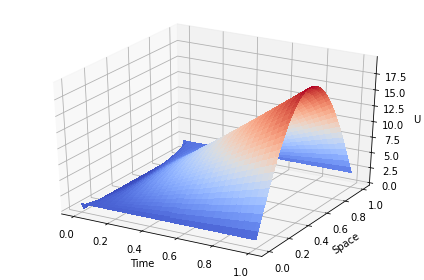

In [18]:
#BTCS con condiciones de Dirichlet
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 1, u(x1,t) = 2
#and initial condition u(x,0) = 0

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

#Creamos el número de puntos en los intervalos de espacio y de tiempo
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

#Definimos las coordenadas donde comienza y termina la barra (en este caso es de longitud 1)
x0 = 0
xL = 1

# ----- Spatial discretization step ----- Definimos el tamaño de los pasos en el espacio
dx = (xL - x0)/(M - 1)

#Definimos el intervalo de tiempo en el cual resolveremos
t0 = 0
tF = 1

# ----- Time step ----- Definimos el tamaño de los pasos en el tiempo
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 10 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

#Creamos un arreglo para el espacio y otro para el tiempo con puntos equidistantes
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Creamos las diagonales importantes de la matriz
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U ----- Creamos una matriz para U
U = np.zeros((M, N))

#----- Initial condition ----- Definimos la condición inicial
U[:,0] = 0

#----- Dirichlet boundary conditions ----- Definimos las condiciones de frontera (Dirichlet)
U[0,:] = 1.0 
U[-1,:] = 2.0

#Resolvemos numéricamente
for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Vemos que al tener un coeficiente de reacción positivo, la mayor concentración es en la sección intermedia, y en los extremos la concentración es muy pequeña.